In [6]:
import math
import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy as np
from numpy import arange

from scipy.optimize import linprog

# Maximum Distribution

Vandelay Industries has 252 sales reps in order to sell its latex products, each to be assigned to one of four marketing teams. If the first team is to have three times as many members as the second team and the third team is to have twice as many members as the fourth team, how can the members be distributed among the teams?

t1 + t2 + t3 + t4 = 252 total sales reps
<br>Team mix constraint 1: t1 = 3t2
<br>Team mix constraint 2: t3 = 2t4
<br>
<br>Taking the two team mix constraints, we can determine the maxmimum distribution of sales reps with:
<br>(t3 + 2t4) + (t1 + 3t2) = 3x + 4y = 252 --> simplified to --> y = 63 - (3/4)x
<br>
<br>Where:
<br>x = the number of 1-2 distributions of teams 3 and 4
<br>y = the numner of 1-3 distributions of teams 1 and 2

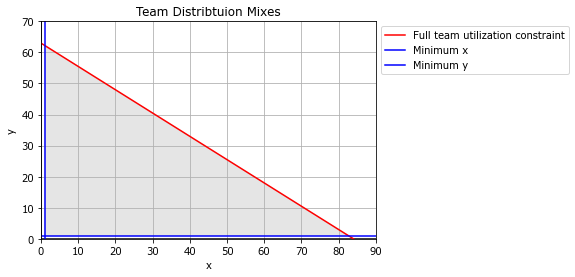

In [2]:
# arrange arrays for graph
x    = arange(0,100,1)
x0   = arange(0,100,1)
y    = 63-(3/4)*x
min_ = 1+0*x0

# Plot limits must be set for the graph.
xlim(0,90)
ylim(0,70)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)

xlabel('x')
ylabel('y')
title('Team Distribtuion Mixes')

# plot constraints
plot(x,y,'red', label='Full team utilization constraint')
plot(min_,x0,'b', label='Minimum x')
plot(x0,min_,'b', label='Minimum y')
legend(bbox_to_anchor=(1, 1))

# set bounds for feasible region
x= [1,        1, 82.66]
y= [1, 63-(3/4),     1]
fill(x,y, color='grey', alpha=0.2)
show()

#### Question 2

Due to new environmental restrictions, Hoch Industries must use a new process to reduce pollution. The old process emits 6 g of Sulphur and 3 g of lead per liter of chemical made. The new process emits 2 g of Sulphur and 4 g of lead per liter of chemical made. The company makes a profit of 25¢ per liter under the old process and 16¢ per liter under the new process. No more than 18,000 g of Sulphur and no more than 12,000 g of lead can be emitted daily. How many liters of chemicals should be made daily under each process to maximize profits?  What is the maximum profit?

In [3]:
# declare lists: old, new  
profitability  = [0.25,0.16]
sulfur         = [6,2]
lead           = [3,4]

# use np.matrix(fn) and np.linalg(fn) to create matrix and solve for constants 
coefficients = np.matrix([sulfur,
                          lead])
constants = np.array([18000,12000])
intersection = np.linalg.solve(coefficients,constants)

profit     = intersection[0]*profitability[0]+intersection[1]*profitability[1]

print('Intersection of maximum profit \nLiters from old process:','{:.2f}'.format(intersection[0]),'\nLiters from new process:',
       intersection[1],'\nTotal profit at intersection:', '{:.2f}'.format(profit))

Intersection of maximum profit 
Liters from old process: 2666.67 
Liters from new process: 1000.0 
Total profit at intersection: 826.67


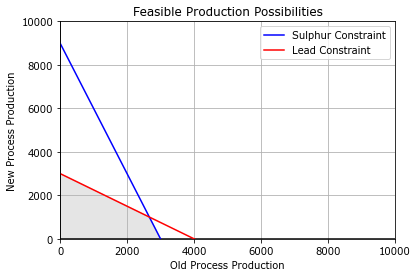

In [4]:
# arrange arrays for graph
x  = arange(0,10000,1)
y0 = arange(0,10000,1)
y1 = 9000 -3*x
y2 = 3000 -(3/4)*x

# Plot limits must be set for the graph.
xlim(0,10000)
ylim(0,10000)
hlines(0,0,10000,color='k')
vlines(0,0,10000,color='k')
grid(True)

# Plot axes need to be labled,title specified and legend shown.
xlabel('Old Process Production')
ylabel('New Process Production')
title('Feasible Production Possibilities')

# plot constraints
plot(x,y1,'b', label='Sulphur Constraint')
plot(x,y2,'r', label='Lead Constraint')  
legend(bbox_to_anchor=(1, 1))

# set bounds for feasible region
x= [0, 3000, 2666+(2/3),     0]
y= [0,    0,       1000,  3000]
fill(x,y, color='grey', alpha=0.2)
show()

using manual and linprog

In [7]:
# Corner Points: 
x= [0, 3000, 2666+(2/3),     0]
y= [0,    0,       1000,  3000]

print('z=0.25x+0.16y')
for i in np.arange(0,4):
    z = 0.25*x[i] + 0.16*y[i]
    print(f'({x[i]},{y[i]})','-->', z) 
    
# Maximization Function
z = [-0.25,-0.16]
# Coefficients
a = [[6,2],[3,4]]
# Constants
b = [18000,12000]

method = 'simplex'

res = linprog(z, A_ub=a, b_ub=b,bounds=(0, None))

print("\n\nSolved using linprog:\n", "Status:", res.message, '\nMaximum:',
     -1*res.fun,'\n',res.x)

z=0.25x+0.16y
(0,0) --> 0.0
(3000,0) --> 750.0
(2666.6666666666665,1000) --> 826.6666666666666
(0,3000) --> 480.0


Solved using linprog:
 Status: Optimization terminated successfully. 
Maximum: 826.6666666421945 
 [2666.66666655 1000.00000003]


# Minimization

Northwestern is looking to hire teachers and TA’s to fill its staffing needs for its summer program at minimum cost. The average monthly salary of a teacher is 2400 and the average monthly salary of a TA is 1100. The program can accommodate up to 45 staff members and needs at least 30 to run properly. They must have at least 10 TA’s and may have up to 3 TA’s for every 2 teachers. How many teachers and TA’s the should the program hire to minimize costs. What is the minimum cost

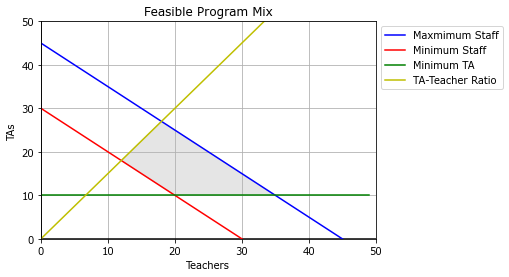

Two additional corner points not able to confirm with eyes: [18. 27.] [12. 18.]

w=2400x+1100y
(18,27) --> 72900
(12,18) --> 48600
(20,10) --> 59000
(35,10) --> 95000


In [8]:
# declare constraints  
c1, c2, c3, c4 = [1,1], [1,1], [0,1], [-3,2]
# arrange constraints for graph
x  = arange(0,50,1)
y1 = 45 - x
y2 = 30 - x
y3 = 10+0*x
y4 = (3/2)*x
# Plot limits must be set for the graph.
xlim(0,50)
ylim(0,50)
hlines(0,0,50,color='k')
vlines(0,0,50,color='k')
grid(True)
# Plot axes need to be labled,title specified and legend shown.
xlabel('Teachers')
ylabel('TAs')
title('Feasible Program Mix')
# plot constraints
plot(x,y1,'b', label='Maxmimum Staff')
plot(x,y2,'r', label='Minimum Staff')  
plot(x,y3,'g', label='Minimum TA')
plot(x,y4,'y', label='TA-Teacher Ratio')
legend(bbox_to_anchor=(1, 1))
# set bounds for feasible region
# from looking at the graph, we can observe points (20,10) and (35,10)
x= [18, 12, 20, 35]
y= [27, 18, 10, 10]
fill(x,y, color='grey', alpha=0.2)
show()
# use np.matrix(fn) and np.linalg(fn) to find two additional corner points cannot see by eye 
coefficients = np.matrix([c1,
                          c4])
constants = np.array([45,0])
intersection_y1_y4 = np.linalg.solve(coefficients,constants)
coefficients2 = np.matrix([c4,
                           c2])
constants2 = np.array([0,30])
intersection_y4_y2 = np.linalg.solve(coefficients2,constants2)
print('Two additional corner points not able to confirm with eyes:',intersection_y1_y4,intersection_y4_y2)
# determine max corner point
print('\nw=2400x+1100y')
for i in np.arange(0,4):
    z = 2400*x[i] + 1100*y[i]
    print(f'({x[i]},{y[i]})','-->', z)